In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [368]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [369]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [370]:
df.shape

(13320, 9)

In [371]:
df.drop(['area_type','availability','society'],axis=1,inplace=True)

In [372]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Handling NA values

In [373]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [374]:
#fill na values
df.balcony = df.balcony.fillna(df.balcony.median())
df.bath = df.bath.fillna(df.bath.median())

In [375]:
df1=df.dropna()

In [376]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [377]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Feature Engineering

In [378]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [379]:
df1['size'].str.split(' ').str[0]

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13303, dtype: object

In [380]:
# Make size integer values 
df1['size']=df1['size'].apply(lambda x : x.split(' ')[0])

C:\Users\saras\AppData\Local\Temp\ipykernel_2972\2716941686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['size']=df1['size'].apply(lambda x : x.split(' ')[0])


In [381]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [382]:
#Remove range values from total sqft
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [383]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [584]:
df1[df1['location']=='Indira Nagar']

,location,size,total_sqft,bath,balcony,price,price_per_sqft
663,Indira Nagar,4,2200.0,4.0,2.0,200.0,9090.909091
1002,Indira Nagar,2,1200.0,2.0,2.0,93.0,7750.000000
1128,Indira Nagar,2,1128.0,2.0,2.0,105.0,9308.510638
1774,Indira Nagar,3,2800.0,3.0,1.0,330.0,11785.714286
2066,Indira Nagar,3,1650.0,3.0,2.0,200.0,12121.212121
3249,Indira Nagar,3,1875.0,3.0,1.0,180.0,9600.000000
3260,Indira Nagar,2,1210.0,2.0,1.0,102.0,8429.752066
3308,Indira Nagar,2,1224.0,2.0,2.0,105.0,8578.431373
3440,Indira Nagar,6,2480.0,4.0,1.0,750.0,30241.935484
3486,Indira Nagar,3,2070.0,3.0,2.0,225.0,10869.565217


In [384]:
df1[~df1['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
56,Devanahalli,4,3010 - 3410,2.0,2.0,192.000
81,Hennur Road,4,2957 - 3450,2.0,2.0,224.500
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...
12990,Talaghattapura,3,1804 - 2273,3.0,0.0,122.000
13059,Harlur,2,1200 - 1470,2.0,0.0,72.760
13240,Devanahalli,1,1020 - 1130,2.0,2.0,52.570
13265,Hoodi,2,1133 - 1384,2.0,0.0,59.135


In [385]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [386]:
#df2=df1.copy()
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)

C:\Users\saras\AppData\Local\Temp\ipykernel_2972\531152323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)


In [387]:
df1['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [388]:
df1.loc[30]

location      Yelahanka
size                  4
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
Name: 30, dtype: object

In [389]:
 df1['price_per_sqft']=(df1['price']*100000)/df1['total_sqft']

C:\Users\saras\AppData\Local\Temp\ipykernel_2972\754292222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_sqft']=(df1['price']*100000)/df1['total_sqft']


In [390]:
df1.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


#### Dimensionality Reduction

In [391]:
# Use 'other' category for location
len(df1.location.unique())

1304

In [392]:
location_stats= df1.location.value_counts()

In [393]:
len(location_stats[location_stats<=10])

1063

In [394]:
loc_lessthan10 = location_stats[location_stats<=10]

In [395]:
df1['location']=df1.location.apply(lambda x: 'other' if x in loc_lessthan10 else x  )

C:\Users\saras\AppData\Local\Temp\ipykernel_2972\1941904373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['location']=df1.location.apply(lambda x: 'other' if x in loc_lessthan10 else x  )


In [396]:
df1.location.value_counts()

other                 2897
Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [397]:
len(df1.location.unique())

242

In [398]:
df1.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [399]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13303 non-null  object 
 1   size            13303 non-null  object 
 2   total_sqft      13257 non-null  float64
 3   bath            13303 non-null  float64
 4   balcony         13303 non-null  float64
 5   price           13303 non-null  float64
 6   price_per_sqft  13257 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [400]:
df1['size']=df1['size'].astype(int)

C:\Users\saras\AppData\Local\Temp\ipykernel_2972\4234757648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['size']=df1['size'].astype(int)


In [401]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13303 non-null  object 
 1   size            13303 non-null  int32  
 2   total_sqft      13257 non-null  float64
 3   bath            13303 non-null  float64
 4   balcony         13303 non-null  float64
 5   price           13303 non-null  float64
 6   price_per_sqft  13257 non-null  float64
dtypes: float64(5), int32(1), object(1)
memory usage: 1.3+ MB


In [402]:
df1.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,13303.000000,13257.000000,13303.000000,13303.000000,13303.000000,1.325700e+04
mean,2.803728,1558.809175,2.689619,1.602872,112.584033,7.912825e+03
std,1.295022,1238.478935,1.339393,0.803455,148.993820,1.064976e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.271186e+03
50%,3.000000,1275.000000,2.000000,2.000000,72.000000,5.438596e+03
75%,3.000000,1680.000000,3.000000,2.000000,120.000000,7.313318e+03
max,43.000000,52272.000000,40.000000,3.000000,3600.000000,1.200000e+07


#### Outlier detection

In [446]:
df2=df1[~(df1.total_sqft/df1['size']<300)]

In [451]:
price_per_sqft_zscore= (df2['price_per_sqft']-df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()

In [452]:
df3=df2[(price_per_sqft_zscore<1) & (price_per_sqft_zscore>-1)]

In [455]:
df3.shape

(11344, 7)

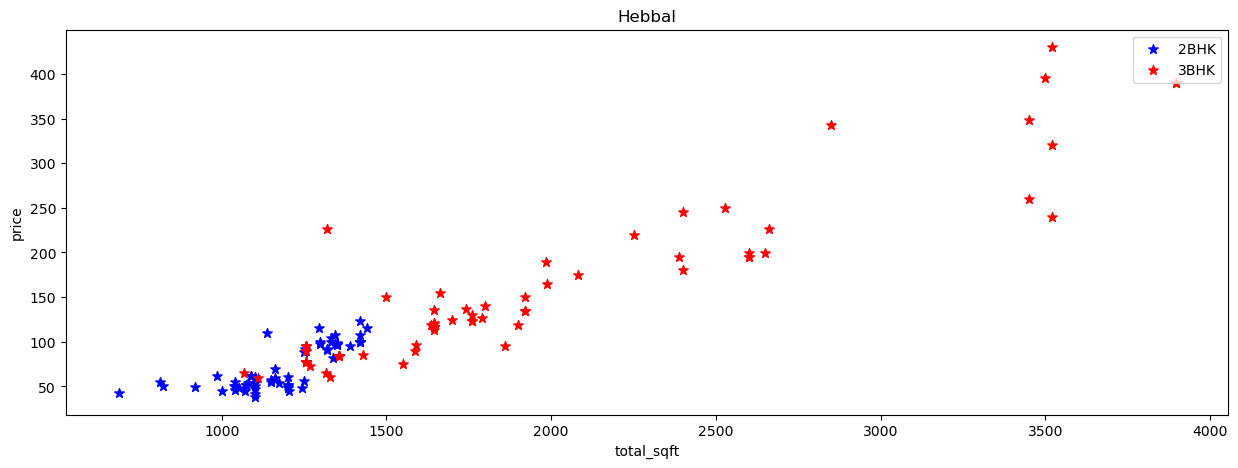

In [408]:
#scatter plot to identify outliers based on location and bhk
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df['size']==2)]
    bhk3=df[(df.location==location)&(df['size']==3)]
    plt.rcParams['figure.figsize']=(15,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='*',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='*',label='3BHK',s=50)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df3,'Hebbal')

In [458]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
       size_stats={}
       for size,size_df in location_df.groupby('size'):
           size_stats[size]={
               'mean': np.mean(size_df.price_per_sqft),
               'std': np.std(size_df.price_per_sqft),
               'count': size_df.shape[0]
           }
    for size, size_df in location_df.groupby('size'):
            stats = size_stats.get(size-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, size_df[size_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
# df8 = df7.copy()
df4.shape

(10325, 7)

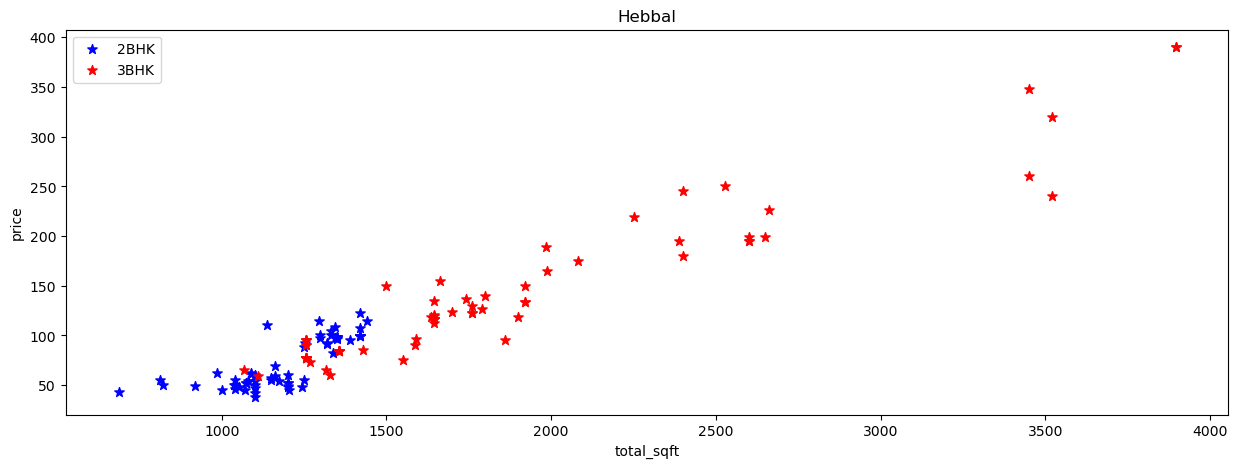

In [459]:
plot_scatter_chart(df4,'Hebbal')

Text(0, 0.5, 'count')

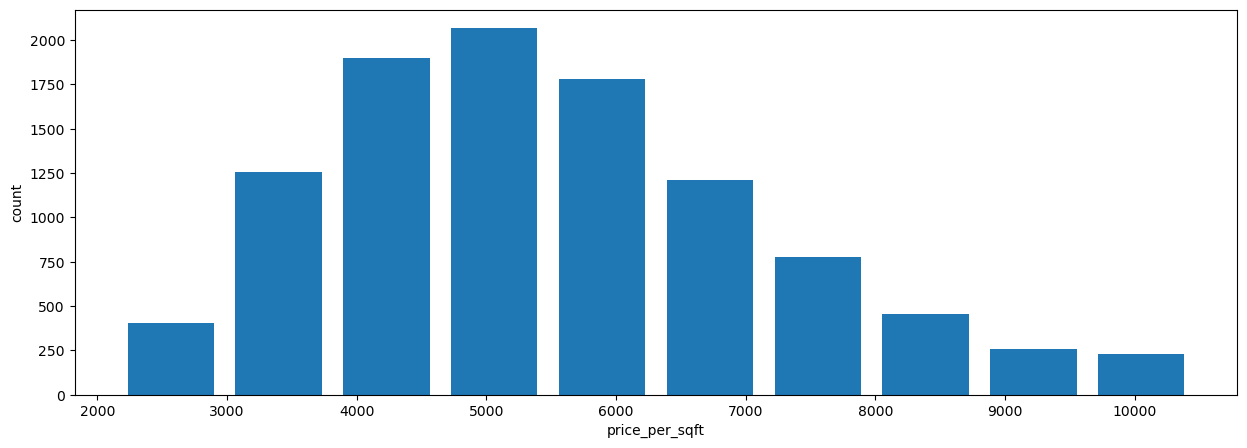

In [460]:
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [461]:
df4.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [462]:
df4[df4.bath>10]

,location,size,total_sqft,bath,balcony,price,price_per_sqft
3096,other,10,12000.0,12.0,2.0,525.0,4375.000000
3609,other,16,10000.0,16.0,2.0,550.0,5500.000000
7979,other,11,6000.0,12.0,2.0,150.0,2500.000000
8636,Neeladri Nagar,10,4000.0,12.0,2.0,160.0,4000.000000
9935,other,13,5425.0,13.0,0.0,275.0,5069.124424


In [463]:
# removing bathrooms higher than bedrooms +2
df4=df4[~(df4.bath>df4['size']+2)]

In [464]:
df4.shape

(10321, 7)

In [465]:
df4.drop('price_per_sqft',axis=1,inplace=True)

#### Handling categorical values

In [467]:
dummies= pd.get_dummies(df4.location,drop_first=True)         

In [468]:
df5=pd.concat([df4,dummies],axis=1)

In [469]:
df5.drop('location',axis=1,inplace=True)

In [470]:
df5.shape

(10321, 245)

#### Model Selection

In [537]:
X=df5.drop('price',axis=1)

In [562]:
X.head()

,size,total_sqft,bath,balcony,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2,1056.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [538]:
y=df5.price

In [539]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [559]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8343954194477897

#### Use K Fold cross validation to measure accuracy of the LinearRegression model


In [541]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 8.17674326e-01,  8.36813491e-01,  8.28033353e-01, -5.32738029e+14,
        8.91217663e-01])

#### Find best model using GridSearchCV¶

In [546]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,logistic_regression,-2.372983e+13,{'fit_intercept': False}
1,lasso,8.083892e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,7.605438e-01,"{'criterion': 'squared_error', 'splitter': 'ra..."


Linear Regression gives the best score. Hence use it to predict price

#### Test the model for few properties

In [591]:
def predict_price(location,size,sqft,bath,balcony):    
    loc_index = np.where(X.columns==location)[0][0] 

    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = sqft
    x[2] = bath
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

#This is done to mimic our training dataset. Remember we performed one hot encoding on our location column before fitting to our model. Our X is structured as follows sqft, bath, bhk and  <one-hot-encoded-columns>. 
#So whenever we try to test our model, we need to transform our input categorical location also as a one hot encoded row. We do this by:
#1. Initializing a vector to number of columns in training set, which in the tutorial is done by setting x = np.zeros(len(X.columns))
#2. To follow the same format as training set we assign x[0] as sqft, x[1] as bath and x[2] and bhk and use the location index to assign 1 for our input location 

In [548]:
X.columns

Index(['size', 'total_sqft', 'bath', 'balcony', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=244)

In [553]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

In [555]:
(len(X.columns))

244

In [578]:
predict_price('1st Phase JP Nagar',2,1000, 2, 2)

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.44582306220576

In [579]:
predict_price('1st Phase JP Nagar',3,1000, 3, 3)

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.03363733457627

In [580]:
predict_price('Indira Nagar',2,1000, 2, 2)

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.12331303024594

In [588]:
predict_price('Indira Nagar',2,1200, 2, 2)

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.19570343931787

#### Export the tested model to a pickle file

In [589]:
import pickle
with open('Real Estate Price Prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

#### Export location and column information to a file that will be useful later on in the prediction application

In [590]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [592]:
import os

In [593]:
os.getcwd()

'C:\\Users\\saras\\steffysara\\EDA'